In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df_main = pd.read_csv("Match_dataset.csv")
df_winner = pd.read_csv("match_results.csv") 


In [100]:
merged_df = df_main.merge(
    df_winner[['Match_ID', 'Winner']],
    on='Match_ID',
    how='left'
)


In [101]:
df_main.columns
df_winner.columns


Index(['Match_ID', 'Winner'], dtype='object')

In [102]:
df = merged_df.copy()

In [103]:
df.head()

,Match_ID,Date,Venue,Team_A,Team_B,Stage,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,...,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Pitch_Type,Avg_T20_Score_Venue,Toss_Winner,Toss_Decision,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total,Winner
0,M0001,2026-03-06,Chennai,New Zealand,Scotland,Super8,5,13,76.97,54.62,...,0,0,Spin-Friendly,155,Team_A,Field,251.27,156.37,168,Team_A
1,M0002,2026-03-07,Mumbai,South Africa,Sri Lanka,Final,6,9,64.19,58.75,...,0,0,Flat,175,Team_B,Bat,249.33,187.44,150,Team_A
2,M0003,2026-03-02,Kolkata,India,PNG,Group,1,20,69.87,45.14,...,1,0,Spin-Friendly,165,Team_B,Field,298.24,54.03,160,Team_A
3,M0004,2026-02-22,Colombo,Netherlands,Ireland,Group,11,12,85.59,61.94,...,0,0,Spin-Friendly,160,Team_A,Bat,197.19,174.95,145,Team_A
4,M0005,2026-02-28,Mumbai,Namibia,South Africa,Group,15,6,45.98,88.52,...,0,0,Flat,175,Team_B,Bat,124.91,271.68,185,Team_B


In [104]:
df.tail()

,Match_ID,Date,Venue,Team_A,Team_B,Stage,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,...,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Pitch_Type,Avg_T20_Score_Venue,Toss_Winner,Toss_Decision,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total,Winner
595,M0596,2026-02-12,Kolkata,England,Zimbabwe,Group,3,14,77.24,61.10,...,0,0,Spin-Friendly,165,Team_B,Field,294.94,154.29,164,Team_A
596,M0597,2026-02-14,Colombo,Australia,England,Group,2,3,85.50,78.79,...,0,0,Spin-Friendly,160,Team_B,Bat,296.33,278.65,187,Team_B
597,M0598,2026-02-13,Chennai,Canada,Australia,Group,18,2,36.86,72.24,...,0,0,Spin-Friendly,155,Team_A,Bat,70.96,285.08,149,Team_B
598,M0599,2026-02-21,Delhi,Namibia,Pakistan,Group,15,4,48.37,53.93,...,0,0,Pace-Friendly,170,Team_B,Bat,129.25,253.03,197,Team_A
599,M0600,2026-02-07,Delhi,Netherlands,Canada,Group,11,18,56.36,46.50,...,0,0,Pace-Friendly,170,Team_A,Bat,192.85,96.30,187,Team_A


In [105]:
df.shape

(600, 22)

In [106]:
df.columns

Index(['Match_ID', 'Date', 'Venue', 'Team_A', 'Team_B', 'Stage',
       'Team_A_Ranking', 'Team_B_Ranking', 'Team_A_Form', 'Team_B_Form',
       'HeadToHead_A_Wins', 'HeadToHead_B_Wins', 'Venue_HomeAdvantage_A',
       'Venue_HomeAdvantage_B', 'Pitch_Type', 'Avg_T20_Score_Venue',
       'Toss_Winner', 'Toss_Decision', 'Team_A_Tech_Index',
       'Team_B_Tech_Index', 'Match_Total', 'Winner'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Match_ID               600 non-null    object 
 1   Date                   600 non-null    object 
 2   Venue                  600 non-null    object 
 3   Team_A                 600 non-null    object 
 4   Team_B                 600 non-null    object 
 5   Stage                  600 non-null    object 
 6   Team_A_Ranking         600 non-null    int64  
 7   Team_B_Ranking         600 non-null    int64  
 8   Team_A_Form            600 non-null    float64
 9   Team_B_Form            600 non-null    float64
 10  HeadToHead_A_Wins      600 non-null    int64  
 11  HeadToHead_B_Wins      600 non-null    int64  
 12  Venue_HomeAdvantage_A  600 non-null    int64  
 13  Venue_HomeAdvantage_B  600 non-null    int64  
 14  Pitch_Type             600 non-null    object 
 15  Avg_T2

In [108]:
df.describe()

,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,HeadToHead_A_Wins,HeadToHead_B_Wins,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Avg_T20_Score_Venue,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total
count,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,10.580000,10.365000,61.17865,61.038950,7.768333,7.858333,0.071667,0.041667,166.781667,190.102250,191.911167,167.296667
std,5.821519,5.720108,15.70957,15.172641,6.186149,6.155058,0.258150,0.199993,8.066750,75.612595,74.113008,24.866562
min,1.000000,1.000000,14.71000,13.280000,0.000000,0.000000,0.000000,0.000000,155.000000,47.880000,41.050000,103.000000
25%,6.000000,5.000000,49.92000,51.015000,2.000000,3.000000,0.000000,0.000000,160.000000,123.220000,130.115000,150.750000
50%,11.000000,10.000000,60.89000,61.080000,7.000000,7.000000,0.000000,0.000000,165.000000,191.230000,191.930000,167.000000
75%,16.000000,15.000000,72.83250,71.350000,12.000000,12.000000,0.000000,0.000000,175.000000,251.585000,259.805000,184.250000
max,20.000000,20.000000,95.00000,95.000000,27.000000,29.000000,1.000000,1.000000,180.000000,339.540000,344.430000,243.000000


In [109]:
df.describe(include='object')

,Match_ID,Date,Venue,Team_A,Team_B,Stage,Pitch_Type,Toss_Winner,Toss_Decision,Winner
count,600,600,600,600,600,600,600,600,600,600
unique,600,30,7,20,20,4,3,2,2,2
top,M0001,2026-02-25,Delhi,India,England,Group,Spin-Friendly,Team_B,Field,Team_A
freq,1,27,91,42,36,510,251,301,315,318


In [110]:
df.isna().any()

Match_ID                 False
Date                     False
Venue                    False
Team_A                   False
Team_B                   False
Stage                    False
Team_A_Ranking           False
Team_B_Ranking           False
Team_A_Form              False
Team_B_Form              False
HeadToHead_A_Wins        False
HeadToHead_B_Wins        False
Venue_HomeAdvantage_A    False
Venue_HomeAdvantage_B    False
Pitch_Type               False
Avg_T20_Score_Venue      False
Toss_Winner              False
Toss_Decision            False
Team_A_Tech_Index        False
Team_B_Tech_Index        False
Match_Total              False
Winner                   False
dtype: bool

In [111]:
df.duplicated().sum()

0

In [112]:
df = df.drop(['Match_ID', 'Date'], axis=1)

In [113]:
num_cols = df.select_dtypes(include=np.number)
cat_cols = df.select_dtypes(include='object')

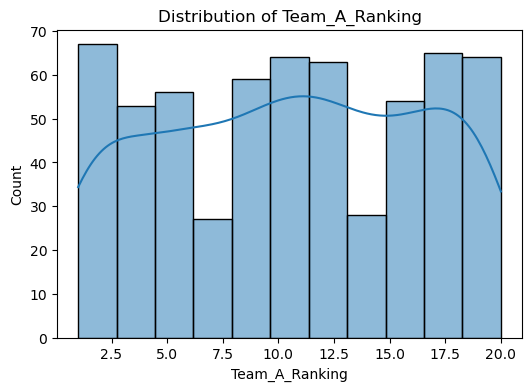

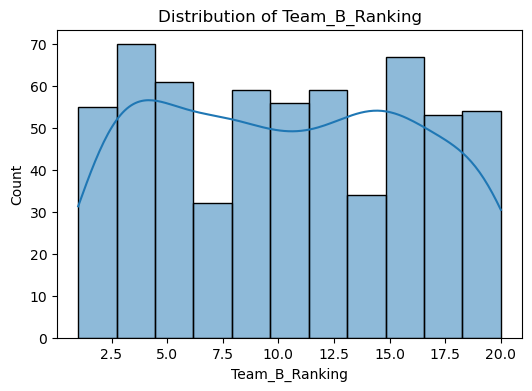

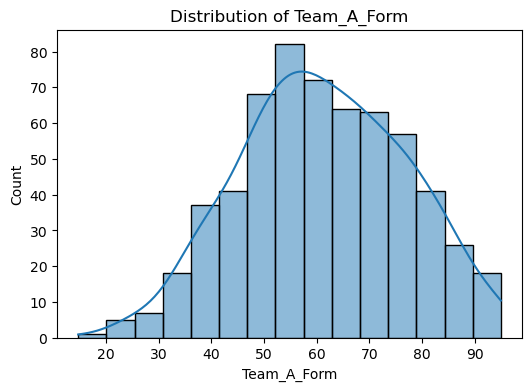

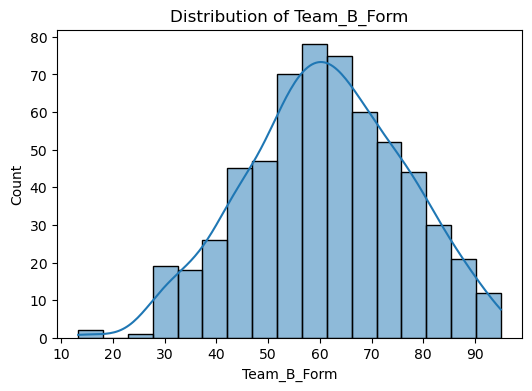

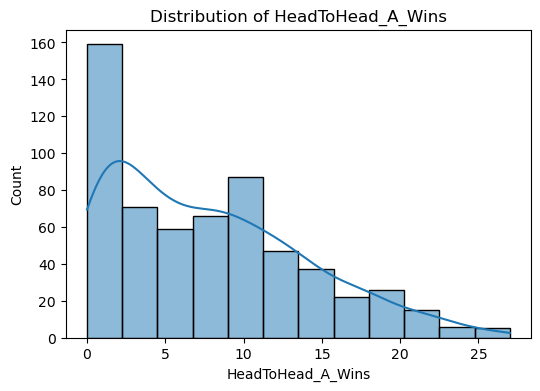

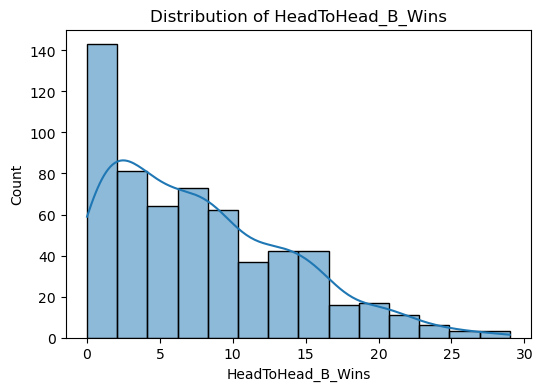

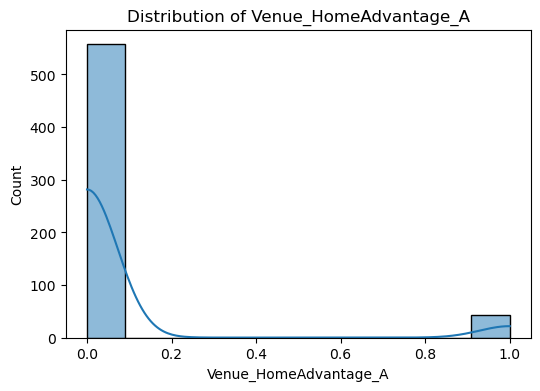

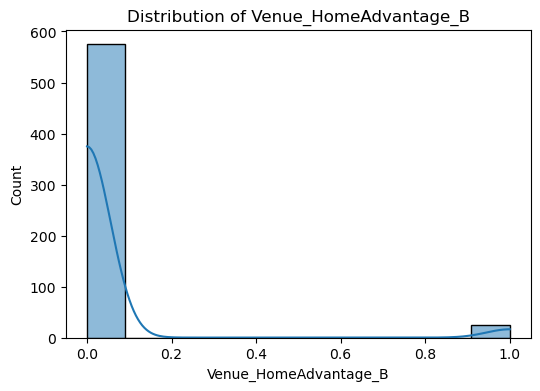

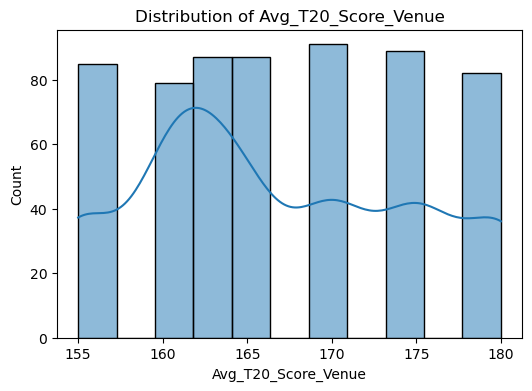

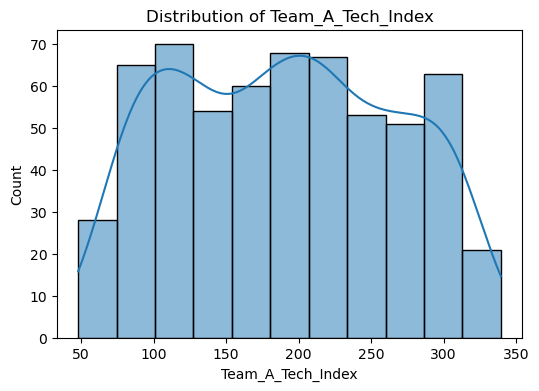

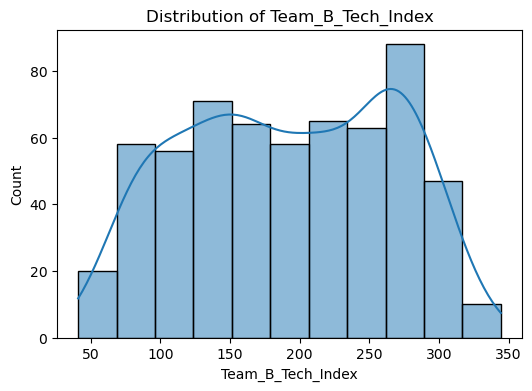

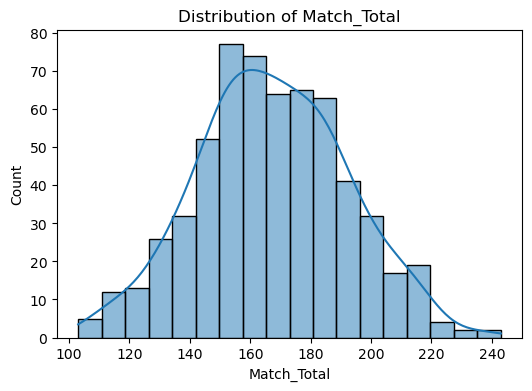

In [114]:
for i in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

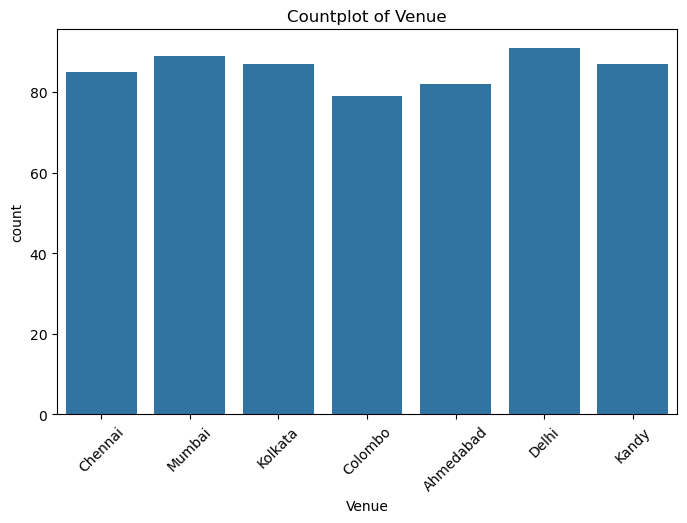

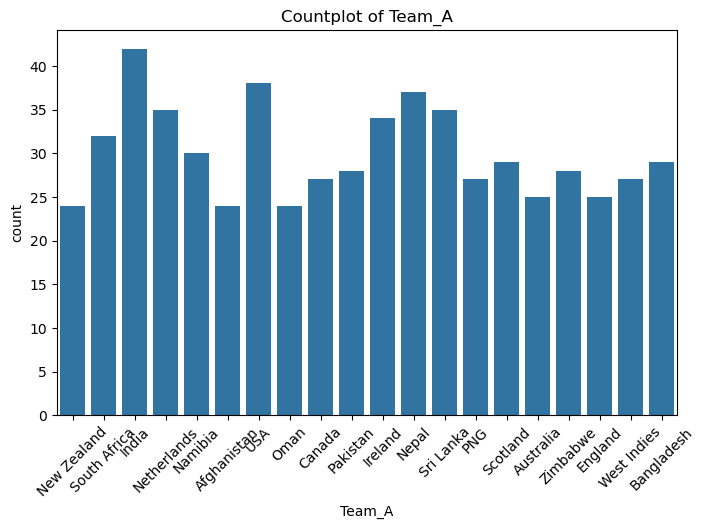

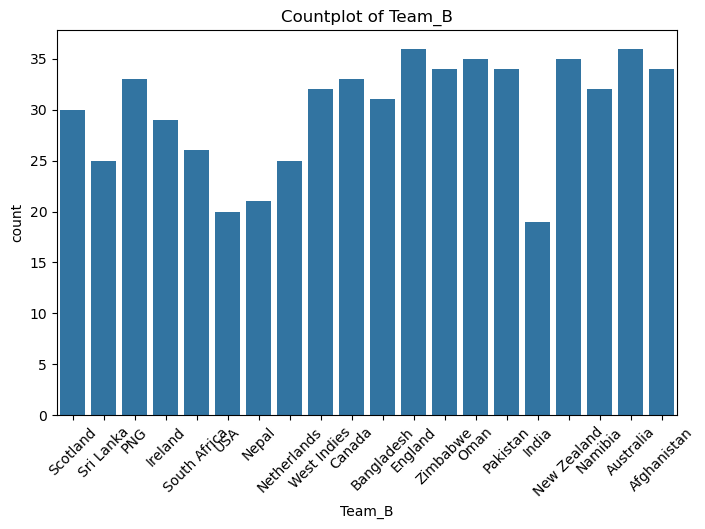

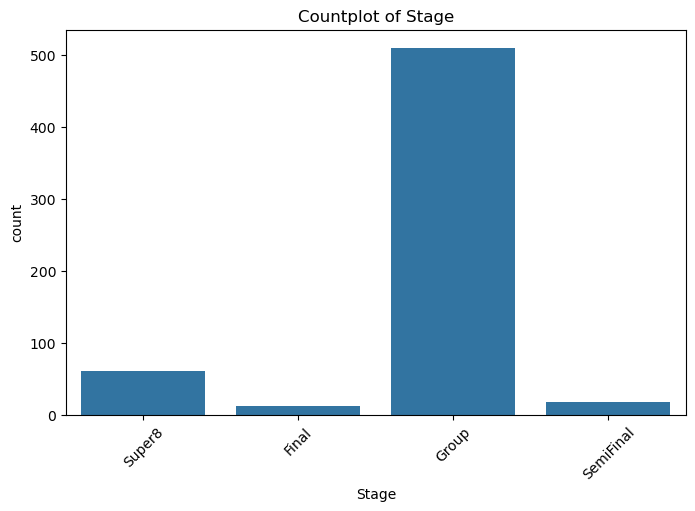

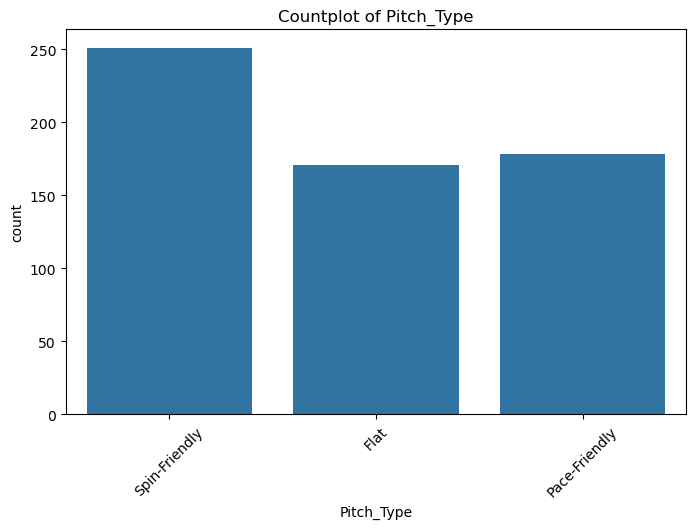

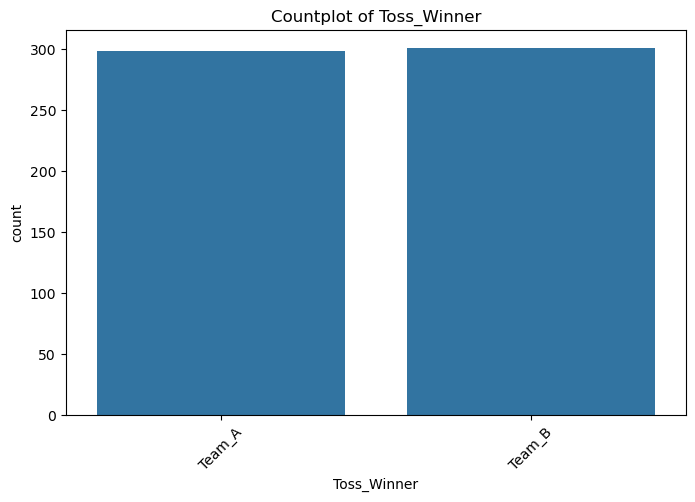

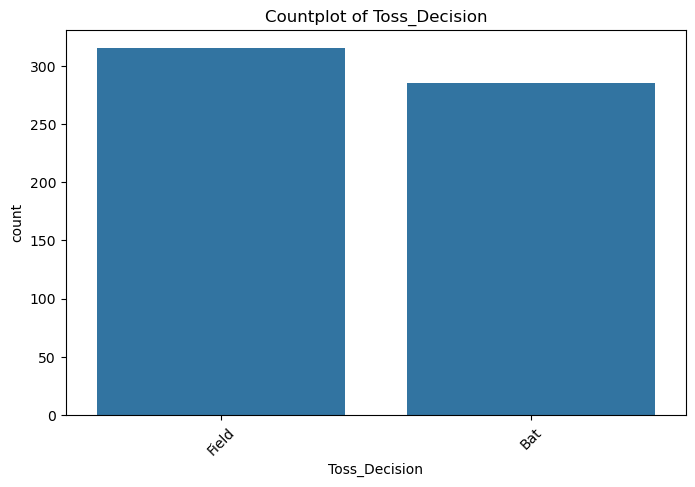

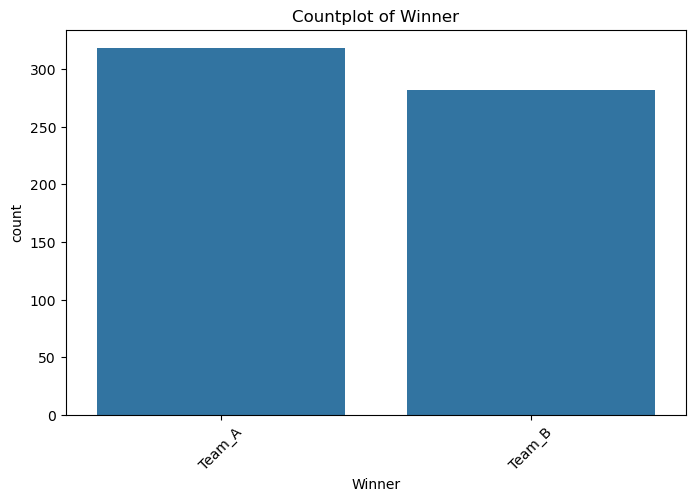

In [115]:
for i in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=i)
    plt.title(f'Countplot of {i}')
    plt.xticks(rotation=45)
    plt.show()

In [116]:
X = df.drop(columns=['Winner'])
y = df['Winner']

In [131]:
y.value_counts()

Winner
Team_A    318
Team_B    282
Name: count, dtype: int64

<Axes: xlabel='Winner'>

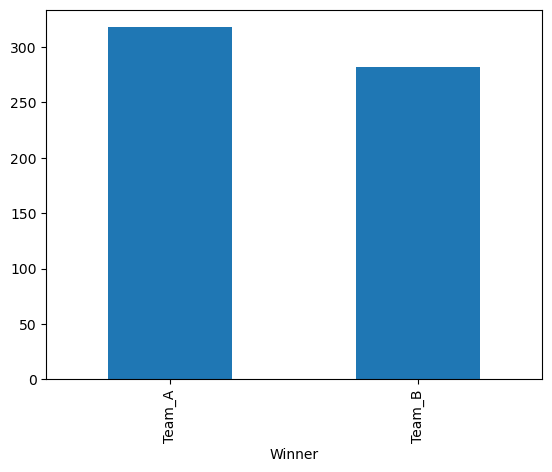

In [132]:
y.value_counts().plot(kind='bar')

In [117]:
from sklearn.model_selection import train_test_split   

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape,

((480, 19), (480,), (120, 19), (120,))

In [120]:
X_train.head()

,Venue,Team_A,Team_B,Stage,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,HeadToHead_A_Wins,HeadToHead_B_Wins,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Pitch_Type,Avg_T20_Score_Venue,Toss_Winner,Toss_Decision,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total
145,Delhi,Afghanistan,Oman,Group,8,16,69.93,56.81,12,8,0,0,Pace-Friendly,170,Team_A,Field,228.33,124.53,189
9,Colombo,Pakistan,South Africa,Group,4,6,85.80,61.02,2,2,0,0,Spin-Friendly,160,Team_B,Bat,284.02,241.05,150
375,Mumbai,Australia,Zimbabwe,Group,2,14,77.10,64.23,25,3,0,0,Flat,175,Team_A,Bat,311.00,154.58,181
523,Mumbai,USA,Afghanistan,Group,17,8,32.44,84.63,5,13,0,0,Flat,175,Team_A,Bat,95.41,224.28,156
188,Chennai,Oman,Zimbabwe,Group,16,14,50.28,53.91,14,14,0,0,Spin-Friendly,155,Team_B,Field,116.48,145.09,171


In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 145 to 102
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Venue                  480 non-null    object 
 1   Team_A                 480 non-null    object 
 2   Team_B                 480 non-null    object 
 3   Stage                  480 non-null    object 
 4   Team_A_Ranking         480 non-null    int64  
 5   Team_B_Ranking         480 non-null    int64  
 6   Team_A_Form            480 non-null    float64
 7   Team_B_Form            480 non-null    float64
 8   HeadToHead_A_Wins      480 non-null    int64  
 9   HeadToHead_B_Wins      480 non-null    int64  
 10  Venue_HomeAdvantage_A  480 non-null    int64  
 11  Venue_HomeAdvantage_B  480 non-null    int64  
 12  Pitch_Type             480 non-null    object 
 13  Avg_T20_Score_Venue    480 non-null    int64  
 14  Toss_Winner            480 non-null    object 
 15  Toss_Deci

In [122]:
X_train.describe(include='object')

,Venue,Team_A,Team_B,Stage,Pitch_Type,Toss_Winner,Toss_Decision
count,480,480,480,480,480,480,480
unique,7,20,20,4,3,2,2
top,Mumbai,India,Oman,Group,Spin-Friendly,Team_A,Field
freq,76,32,32,407,201,244,256


In [123]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [124]:
cat_cols = cat_cols.drop('Winner',axis=1)

In [125]:
cat_cols

,Venue,Team_A,Team_B,Stage,Pitch_Type,Toss_Winner,Toss_Decision
0,Chennai,New Zealand,Scotland,Super8,Spin-Friendly,Team_A,Field
1,Mumbai,South Africa,Sri Lanka,Final,Flat,Team_B,Bat
2,Kolkata,India,PNG,Group,Spin-Friendly,Team_B,Field
3,Colombo,Netherlands,Ireland,Group,Spin-Friendly,Team_A,Bat
4,Mumbai,Namibia,South Africa,Group,Flat,Team_B,Bat
...,...,...,...,...,...,...,...
595,Kolkata,England,Zimbabwe,Group,Spin-Friendly,Team_B,Field
596,Colombo,Australia,England,Group,Spin-Friendly,Team_B,Bat
597,Chennai,Canada,Australia,Group,Spin-Friendly,Team_A,Bat
598,Delhi,Namibia,Pakistan,Group,Pace-Friendly,Team_B,Bat


In [126]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), X_train.select_dtypes(include='object').columns)
    ], remainder='passthrough'
)

In [127]:
preprocessor.set_output(transform='pandas')

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. ``""{fea

In [128]:
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)

In [129]:
X_train_tf

,cat__Venue_Chennai,cat__Venue_Colombo,cat__Venue_Delhi,cat__Venue_Kandy,cat__Venue_Kolkata,cat__Venue_Mumbai,cat__Team_A_Australia,cat__Team_A_Bangladesh,cat__Team_A_Canada,cat__Team_A_England,...,remainder__Team_A_Form,remainder__Team_B_Form,remainder__HeadToHead_A_Wins,remainder__HeadToHead_B_Wins,remainder__Venue_HomeAdvantage_A,remainder__Venue_HomeAdvantage_B,remainder__Avg_T20_Score_Venue,remainder__Team_A_Tech_Index,remainder__Team_B_Tech_Index,remainder__Match_Total
145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.93,56.81,12,8,0,0,170,228.33,124.53,189
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.80,61.02,2,2,0,0,160,284.02,241.05,150
375,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,77.10,64.23,25,3,0,0,175,311.00,154.58,181
523,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,32.44,84.63,5,13,0,0,175,95.41,224.28,156
188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.28,53.91,14,14,0,0,155,116.48,145.09,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.39,45.46,11,15,0,0,160,107.68,131.31,178
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.59,43.20,17,12,0,0,180,186.81,149.99,173
270,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,83.93,28.51,24,3,0,0,162,309.42,86.35,182
435,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.67,73.06,1,9,0,0,170,143.63,263.96,199


In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [133]:
model = DecisionTreeClassifier(random_state=42,max_depth=5,min_samples_leaf=10)
model.fit(X_train_tf, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [134]:
y_pred = model.predict(X_test_tf)  

In [142]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

In [143]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8833333333333333
Classification Report:
               precision    recall  f1-score   support

      Team_A       0.92      0.89      0.91        75
      Team_B       0.83      0.87      0.85        45

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120

F1 Score: 0.8838131609870741


<Axes: >

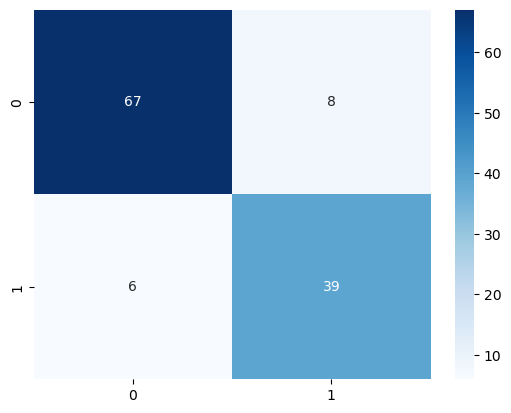

In [144]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [145]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tf, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [146]:
y_pred_rf = rf.predict(X_test_tf)

In [147]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

      Team_A       0.91      0.84      0.88        75
      Team_B       0.76      0.87      0.81        45

    accuracy                           0.85       120
   macro avg       0.84      0.85      0.84       120
weighted avg       0.86      0.85      0.85       120



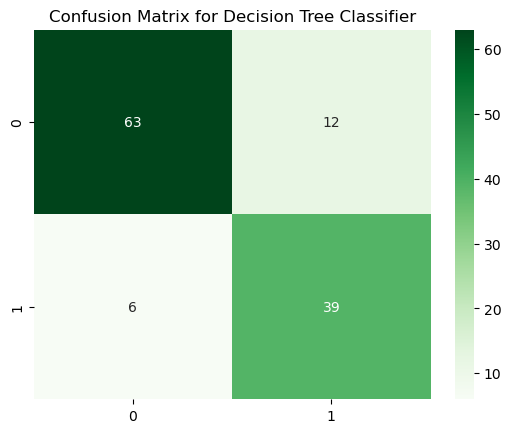

In [141]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [148]:
print("f1_score:", f1_score(y_test, y_pred_rf, average='weighted'))

f1_score: 0.8515625
